In [1]:
# Import required libraries
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [2]:
pd.set_option('max_columns', 100)

In [3]:
# Load the dataset
dataset = pd.read_csv("data_after_cleaning.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119418 entries, 0 to 119417
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    119418 non-null  int64  
 1   price         119418 non-null  int64  
 2   year          119418 non-null  float64
 3   model         119418 non-null  object 
 4   condition     83010 non-null   object 
 5   cylinders     94740 non-null   object 
 6   fuel          119418 non-null  object 
 7   odometer      119418 non-null  float64
 8   transmission  119418 non-null  object 
 9   drive         119418 non-null  object 
 10  type          119418 non-null  object 
 11  paint_color   119418 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 10.9+ MB


In [5]:
# Removing unnamed 1st column
dataset.drop(dataset.columns[0], axis=1, inplace=True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119418 entries, 0 to 119417
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         119418 non-null  int64  
 1   year          119418 non-null  float64
 2   model         119418 non-null  object 
 3   condition     83010 non-null   object 
 4   cylinders     94740 non-null   object 
 5   fuel          119418 non-null  object 
 6   odometer      119418 non-null  float64
 7   transmission  119418 non-null  object 
 8   drive         119418 non-null  object 
 9   type          119418 non-null  object 
 10  paint_color   119418 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 10.0+ MB


<h2>Data Visualization</h2>

<AxesSubplot:title={'center':'Distribution of the prices'}, xlabel='price'>

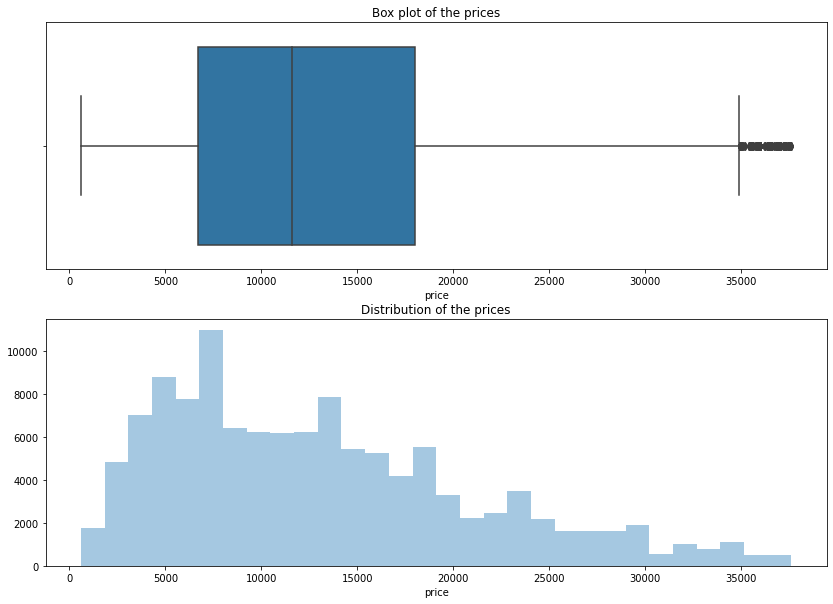

In [7]:
fig, axs = plt.subplots(2, figsize=(14, 10))
axs[0].set_title('Box plot of the prices')
sns.boxplot(x='price', data = dataset, ax = axs[0])
axs[1].set_title('Distribution of the prices')
sns.distplot(dataset['price'], ax=axs[1], bins=30, kde=False)

After data cleaning, the distribution of car prices looks better.

<AxesSubplot:title={'center':'Box plot of the odometer'}, xlabel='odometer'>

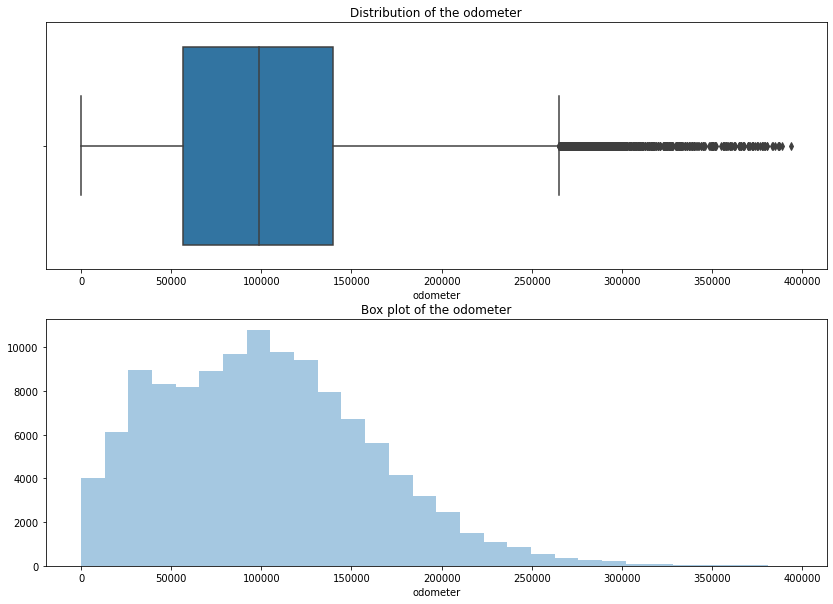

In [8]:
fig, axs = plt.subplots(2, figsize=(14, 10))
axs[0].set_title('Distribution of the odometer')
sns.boxplot(x='odometer', data = dataset, ax=axs[0])
axs[1].set_title('Box plot of the odometer')
sns.distplot(dataset['odometer'], ax = axs[1], bins=30, kde=False)

In [9]:
dataset['paint_color'].value_counts()

white     29004
black     23726
silver    18709
grey      13488
blue      12137
red       11412
custom     3829
green      2973
brown      2626
orange      637
yellow      612
purple      265
Name: paint_color, dtype: int64

<AxesSubplot:title={'center':'Box plot of the prices on each color'}, xlabel='paint_color', ylabel='price'>

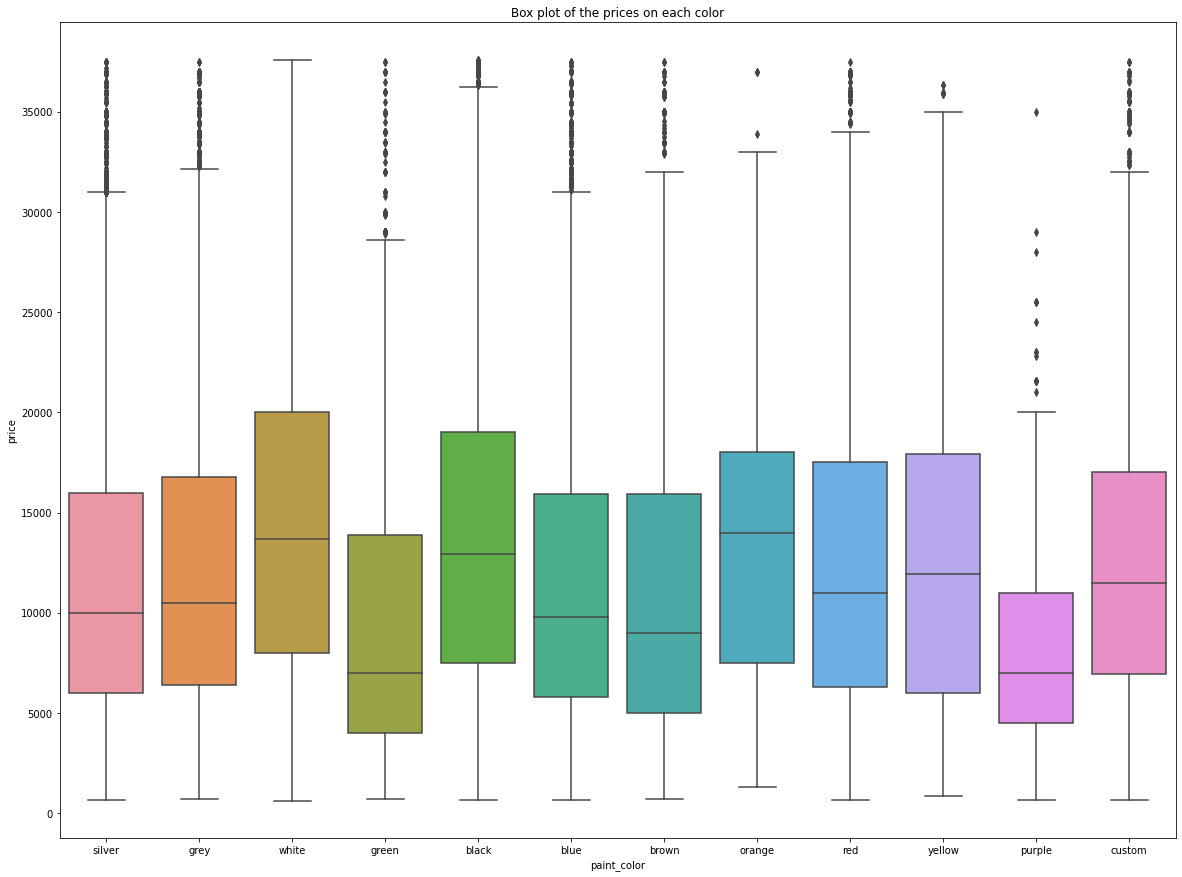

In [10]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Box plot of the prices on each color')
sns.boxplot(x='paint_color', y='price', data = dataset)

In [11]:
dataset['type'].value_counts()

SUV            32667
sedan          32205
truck          15453
pickup         15229
coupe           5197
hatchback       4173
wagon           4104
van             3090
mini-van        2559
other           2436
convertible     2009
offroad          237
bus               59
Name: type, dtype: int64

<AxesSubplot:title={'center':'Box plot of the prices on each car type'}, xlabel='type', ylabel='price'>

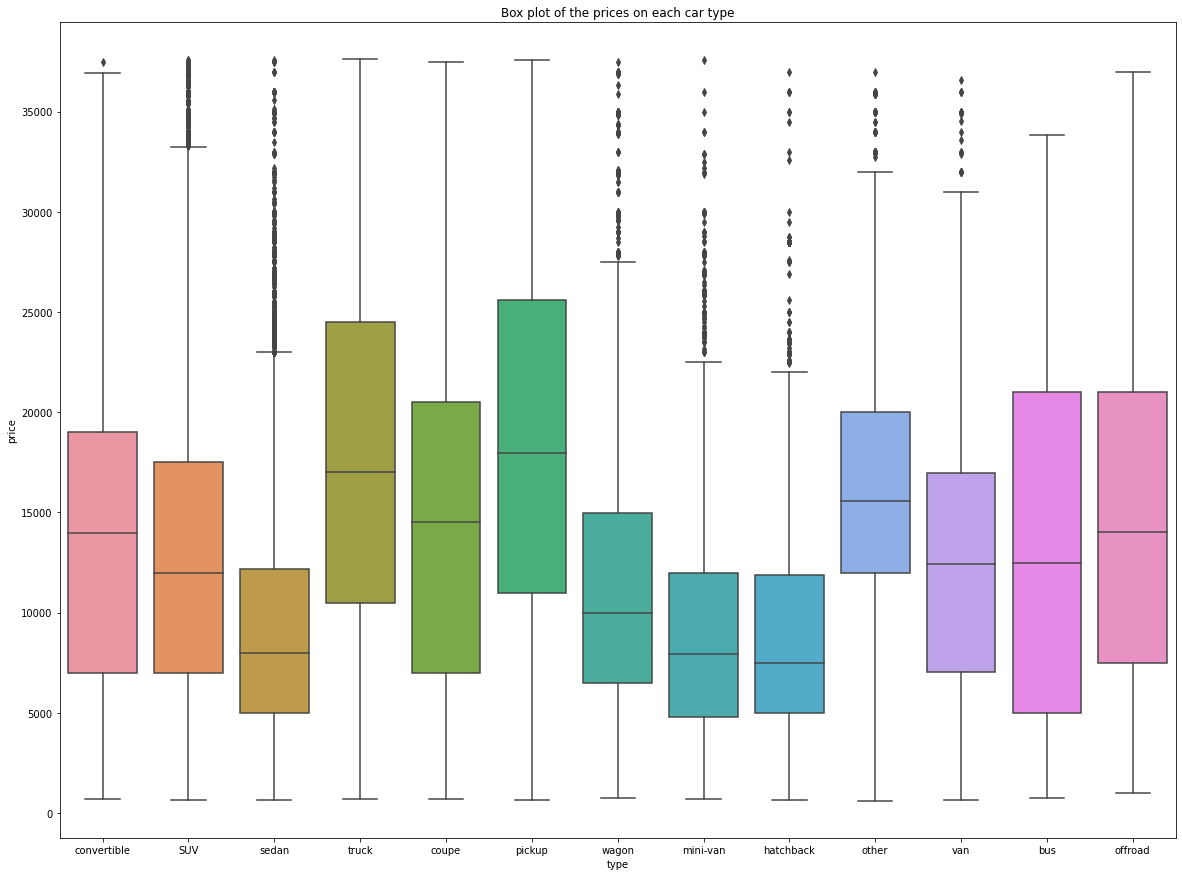

In [12]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Box plot of the prices on each car type')
sns.boxplot(x='type', y='price', data = dataset)

In [13]:
print(dataset['condition'].value_counts())
print('\n')
print(dataset['cylinders'].value_counts())
print('\n')
print(dataset['fuel'].value_counts())
print('\n')
print(dataset['transmission'].value_counts())
print('\n')
print(dataset['drive'].value_counts())
print('\n')

excellent    39665
good         33088
like new      8005
fair          1859
new            236
salvage        157
Name: condition, dtype: int64


4 cylinders     35288
6 cylinders     32045
8 cylinders     25871
5 cylinders       771
10 cylinders      397
other             227
3 cylinders       137
12 cylinders        4
Name: cylinders, dtype: int64


gas         107496
diesel        7482
other         3044
hybrid        1252
electric       144
Name: fuel, dtype: int64


automatic    108696
manual         6036
other          4686
Name: transmission, dtype: int64


4wd    51582
fwd    48619
rwd    19217
Name: drive, dtype: int64




<AxesSubplot:title={'center':'Box plot of prices on each drive type'}, xlabel='drive', ylabel='price'>

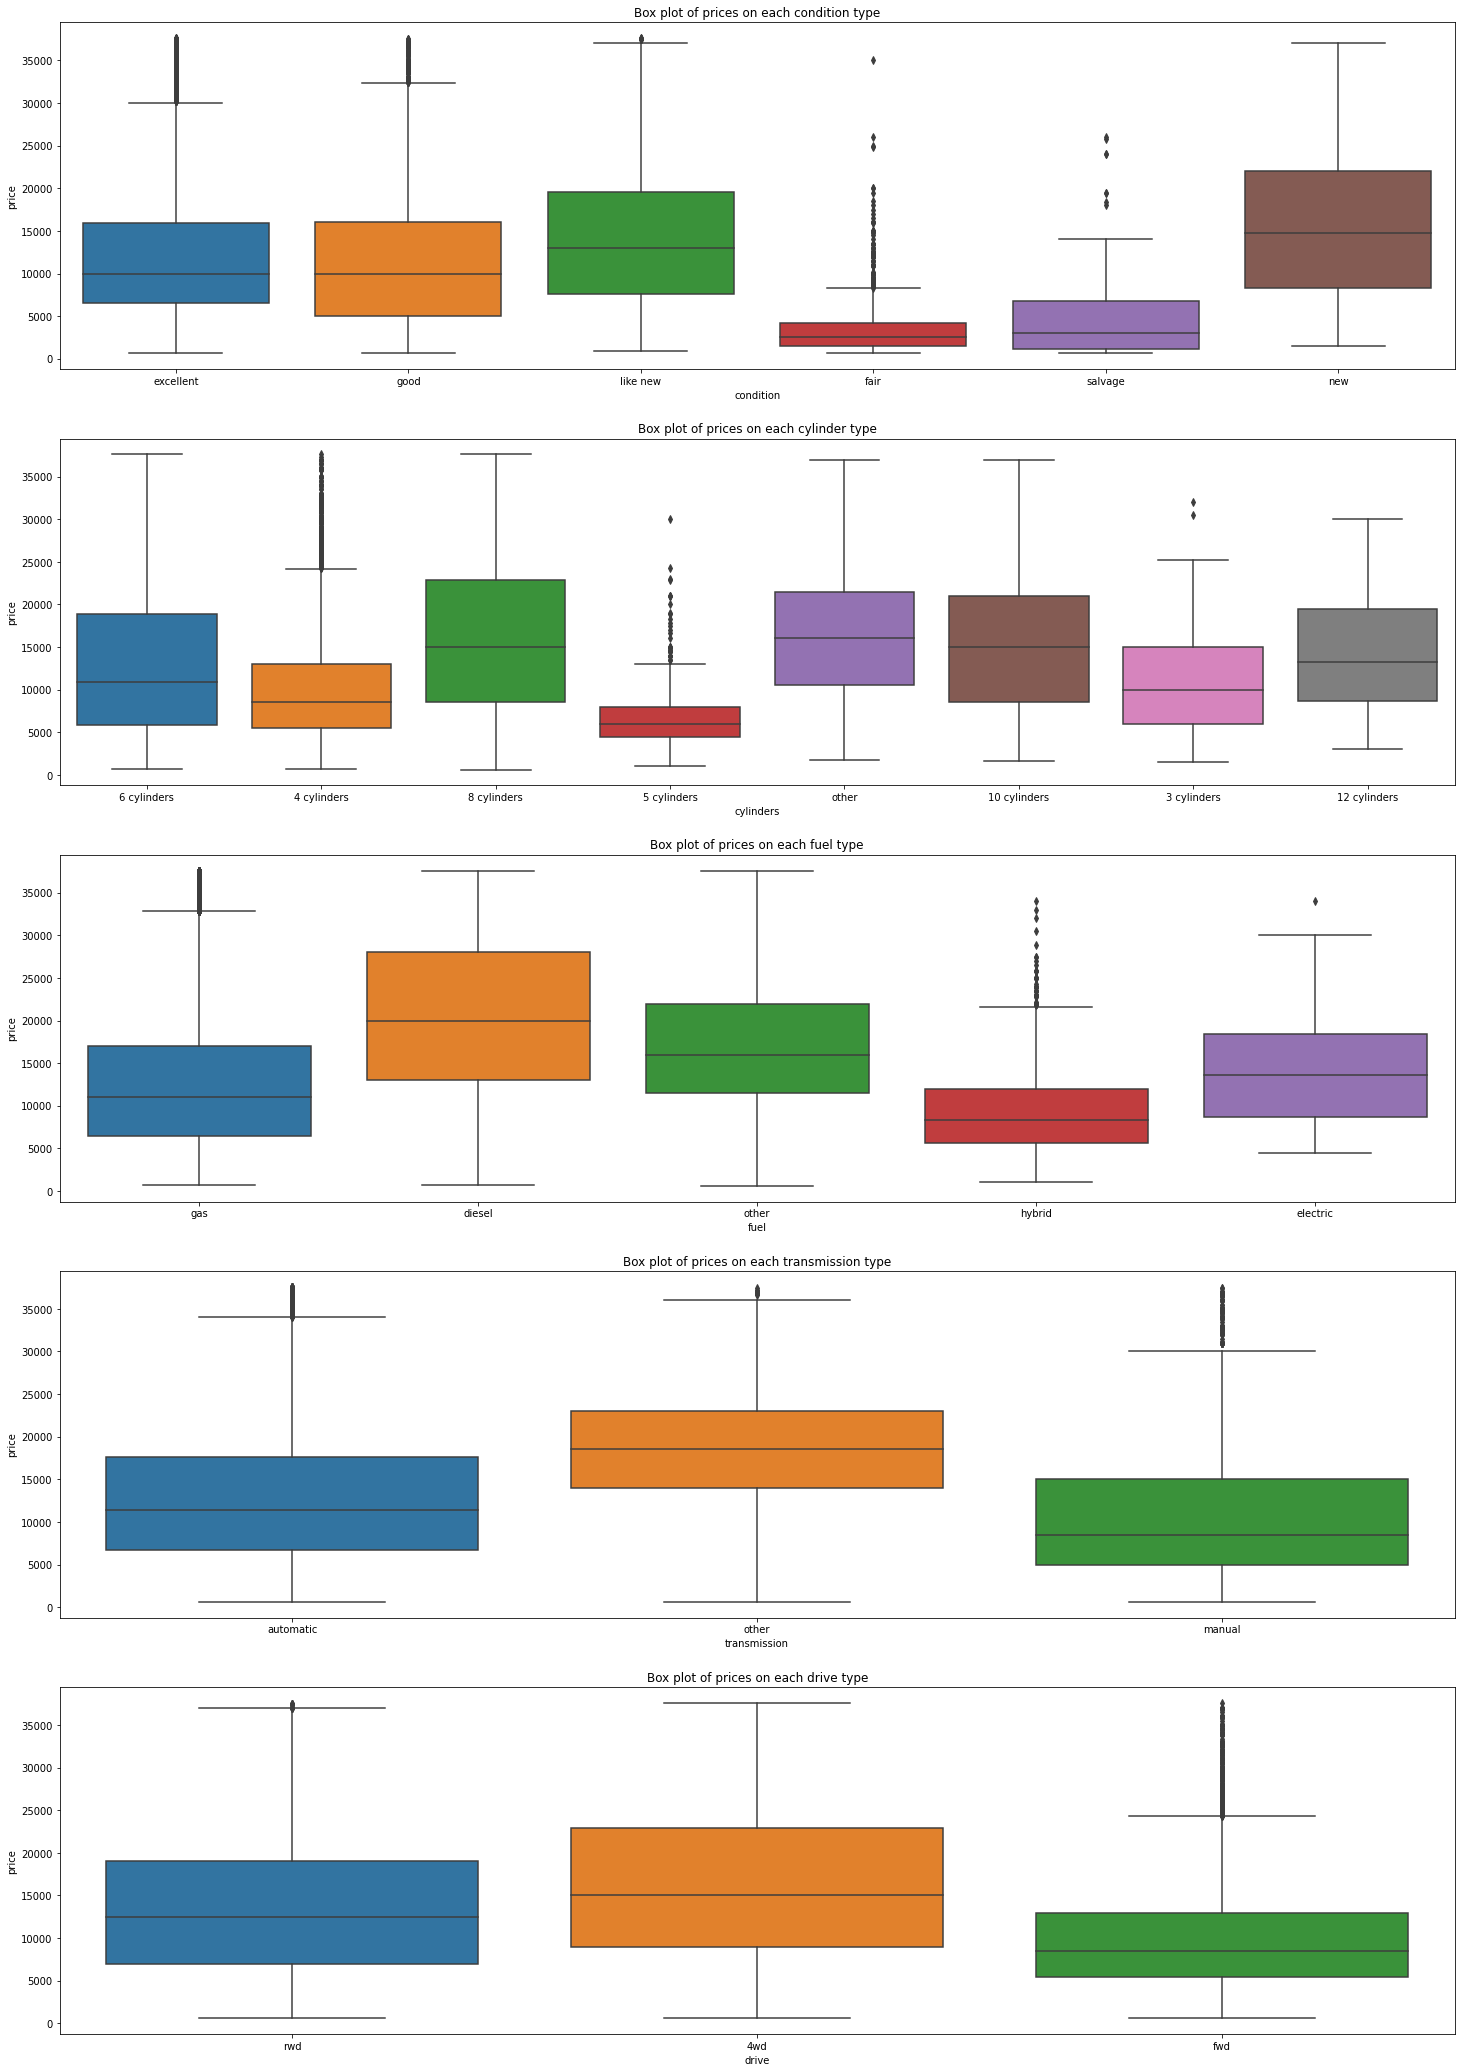

In [14]:
fig, axs = plt.subplots(5, figsize=(25, 37))
axs[0].set_title('Box plot of prices on each condition type')
sns.boxplot(x='condition', y='price', data = dataset, ax=axs[0])
axs[1].set_title('Box plot of prices on each cylinder type')
sns.boxplot(x='cylinders', y='price', data = dataset, ax=axs[1])
axs[2].set_title('Box plot of prices on each fuel type')
sns.boxplot(x='fuel', y='price', data = dataset, ax=axs[2])
axs[3].set_title('Box plot of prices on each transmission type')
sns.boxplot(x='transmission', y='price', data = dataset, ax=axs[3])
axs[4].set_title('Box plot of prices on each drive type')
sns.boxplot(x='drive', y='price', data = dataset, ax=axs[4])

<AxesSubplot:title={'center':'Scatter plot of the prices in each year, colored by transmission type'}, xlabel='year', ylabel='price'>

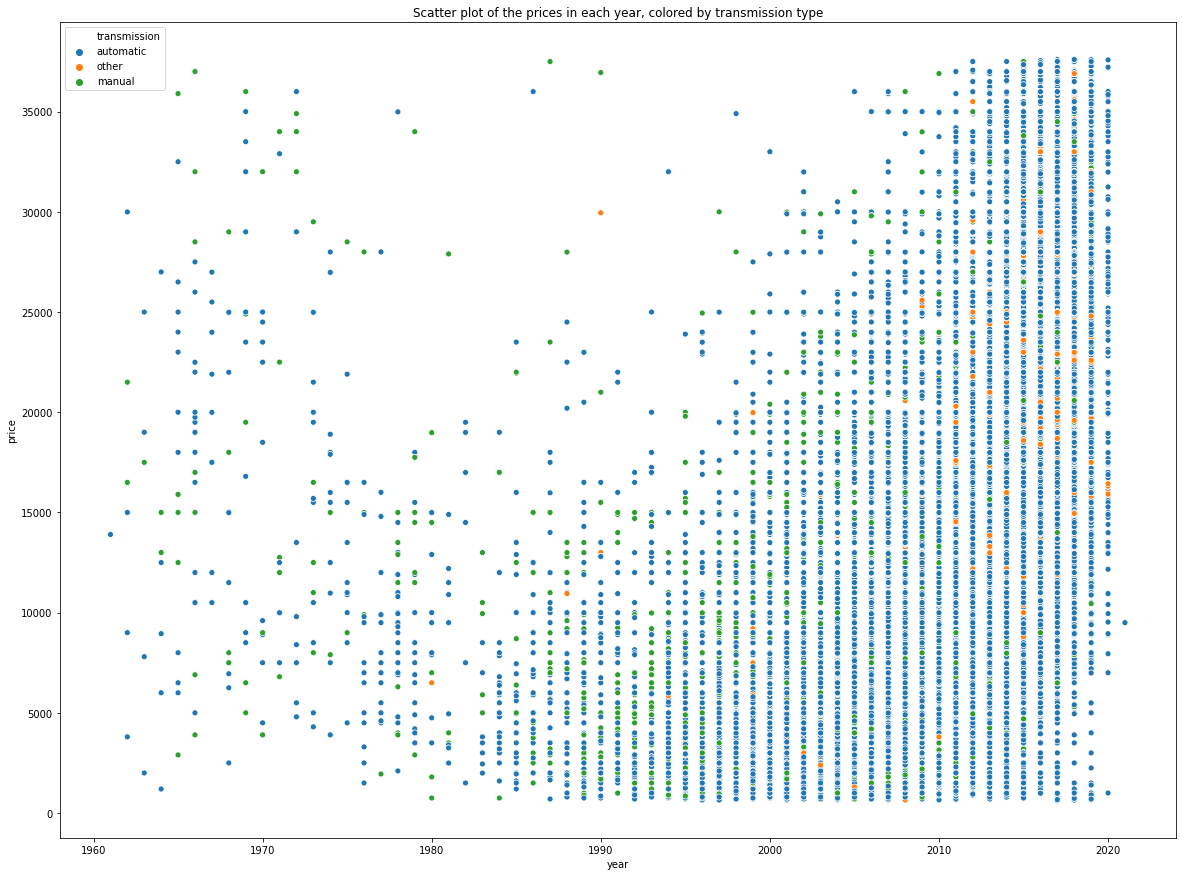

In [15]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Scatter plot of the prices in each year, colored by transmission type')
sns.scatterplot(x='year', y='price', data=dataset, hue = 'transmission')

<AxesSubplot:title={'center':'Scatter plot of the prices in each year, colored by drive type'}, xlabel='year', ylabel='price'>

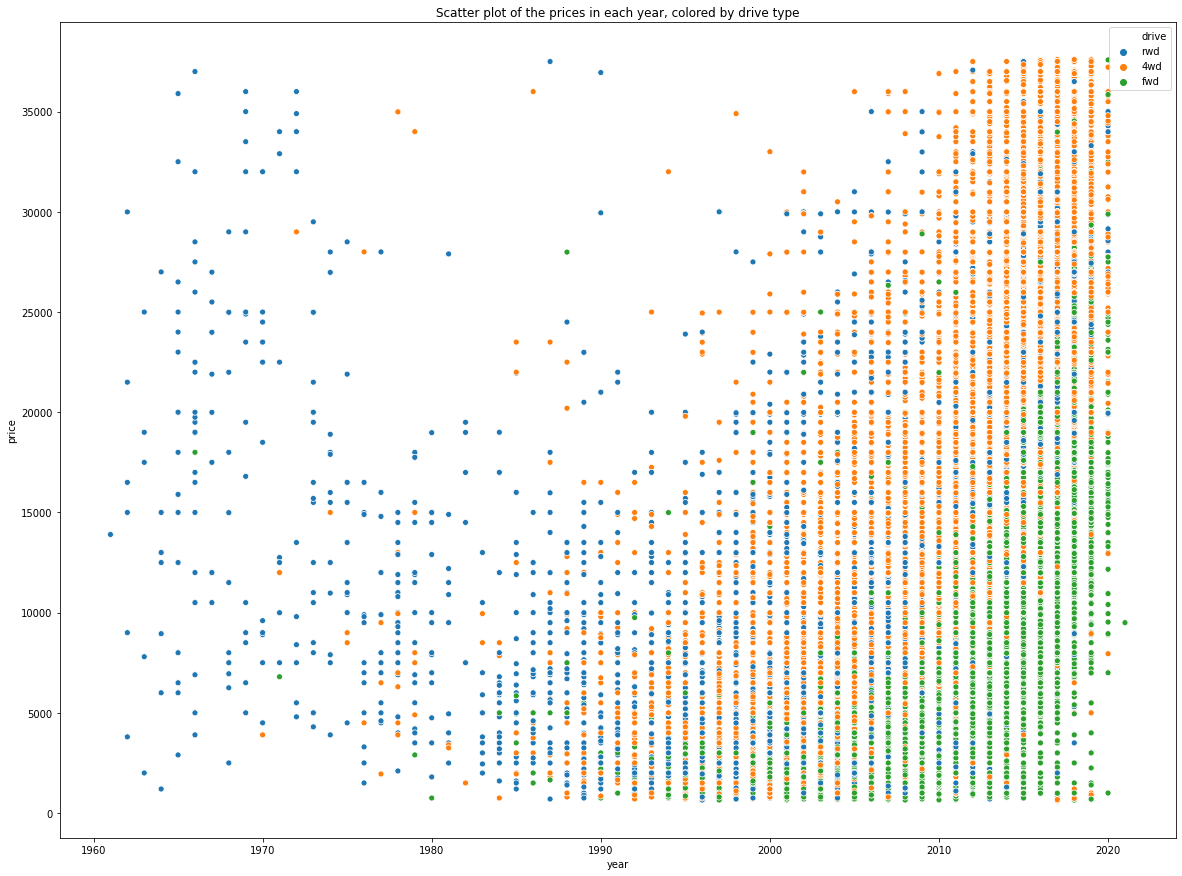

In [16]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Scatter plot of the prices in each year, colored by drive type')
sns.scatterplot(x='year', y='price', data=dataset, hue = 'drive')

<AxesSubplot:title={'center':'Scatter plot of the prices in each year, colored by fuel type'}, xlabel='year', ylabel='price'>

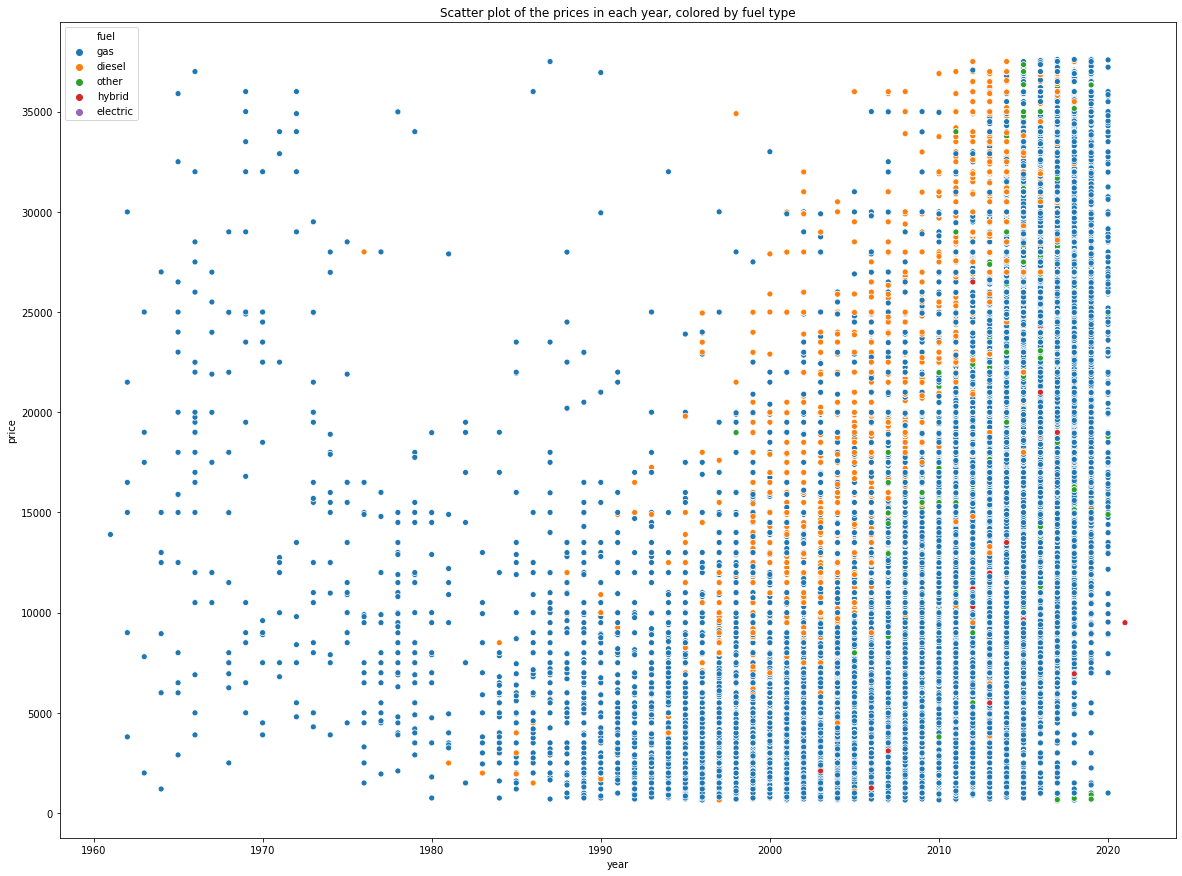

In [17]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Scatter plot of the prices in each year, colored by fuel type')
sns.scatterplot(x='year', y='price', data=dataset, hue = 'fuel')

<AxesSubplot:title={'center':'Scatter plot of the prices in each year, colored by cylinder type'}, xlabel='year', ylabel='price'>

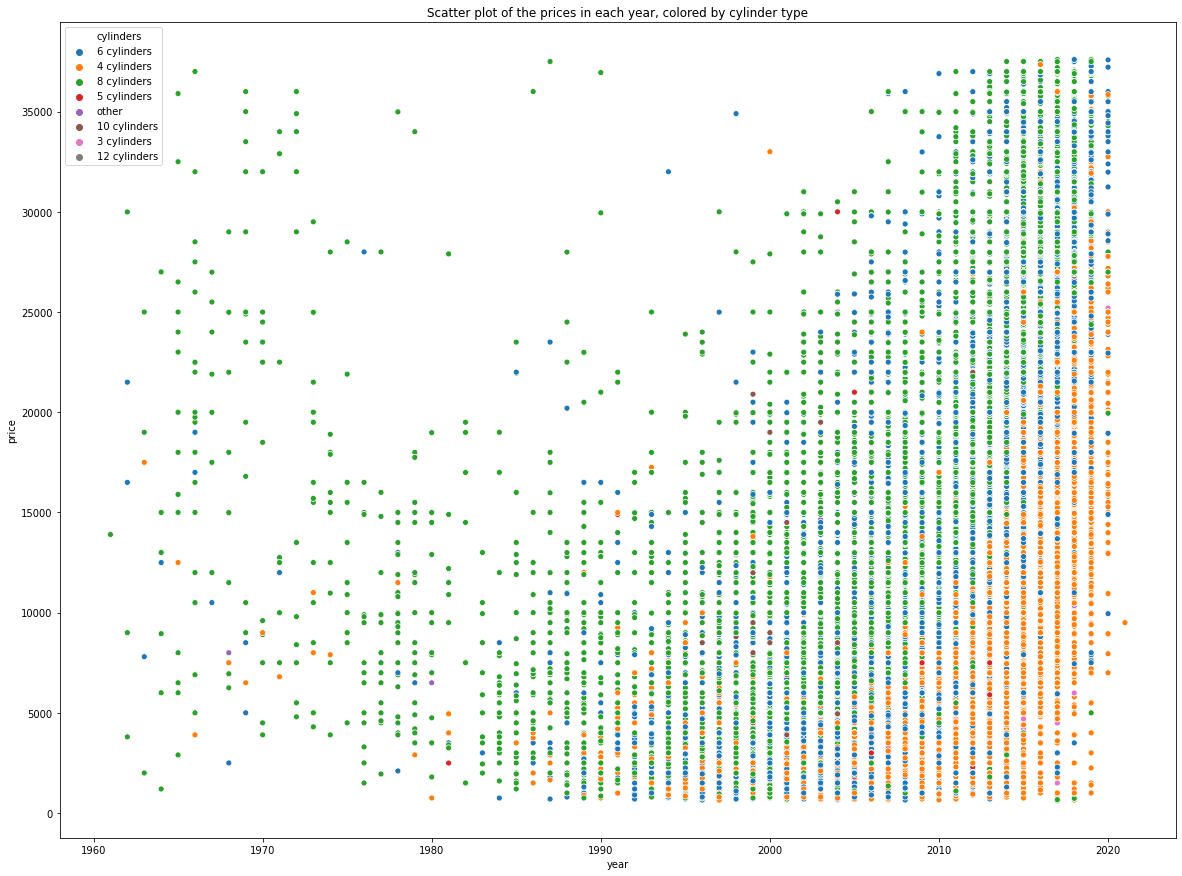

In [18]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Scatter plot of the prices in each year, colored by cylinder type')
sns.scatterplot(x='year', y='price', data=dataset, hue = 'cylinders')

<AxesSubplot:title={'center':'Scatter plot of the odometer of the cars in each year, colored by car condition'}, xlabel='year', ylabel='odometer'>

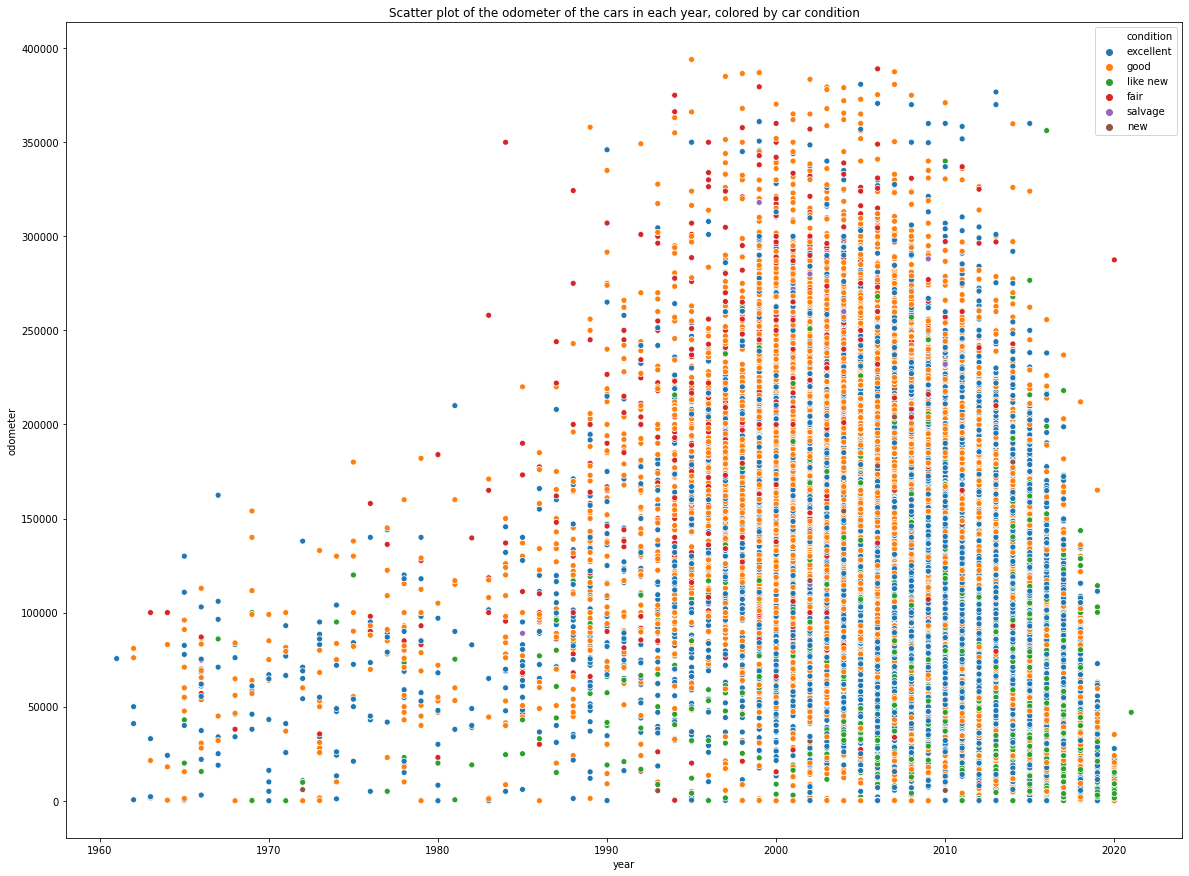

In [19]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Scatter plot of the odometer of the cars in each year, colored by car condition')
sns.scatterplot(x='year', y='odometer', data=dataset, hue = 'condition')

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119418 entries, 0 to 119417
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         119418 non-null  int64  
 1   year          119418 non-null  float64
 2   model         119418 non-null  object 
 3   condition     83010 non-null   object 
 4   cylinders     94740 non-null   object 
 5   fuel          119418 non-null  object 
 6   odometer      119418 non-null  float64
 7   transmission  119418 non-null  object 
 8   drive         119418 non-null  object 
 9   type          119418 non-null  object 
 10  paint_color   119418 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 10.0+ MB


In [21]:
# Find all the non-numerical features
temp_features = dataset.columns.values.tolist()
features = []
for column_name in temp_features:
    if dataset[column_name].dtype == 'object':
        features.append(column_name)
print(features)

['model', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type', 'paint_color']


In [22]:
# https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

# do label encoding
# # Converting from strings to numerics
# for column in features:
#     if dataset[column].dtype == 'object':
#         le = LabelEncoder()
#         le.fit(list(dataset[column].astype(str).values))
#         dataset[column] = le.transform(list(dataset[column].astype(str).values))

# do one hot encoding
for column in features:
    column = pd.get_dummies(dataset[column], drop_first=True)
    dataset = pd.concat([dataset,column],axis=1)
dataset = dataset.drop(columns = features)

In [23]:
dataset.head()

,price,year,odometer,1500,1500 4x4,1500 big horn,1500 crew cab,1500 quad cab,1500 slt,1500 sport 4x4 1/2 ton,200,2500,2500 4x4,2500 crew cab,2500 slt,3,3 series,3 series 328i convertible 2d,3-series,300,325i,328,328i,328xi,335i,3500,350z,370z coupe 2d,4 series 428i coupe 2d,4-runner,4500,4runner,4runner limited,4runner sr5,4runner sr5 4x4 gas suv,5 series,5-series,500,528i,535i,5500,6,7 series,HUMMER H2,HUMMER H3,International 4300,Isuzu NPR,Isuzu NPR HD,Porsche Cayenne,Scion tC,...,yaris,yukon,yukon denali,yukon slt,yukon xl,yukon xl denali,z4,fair,good,like new,new,salvage,12 cylinders,3 cylinders,4 cylinders,5 cylinders,6 cylinders,8 cylinders,other,electric,gas,hybrid,other,manual,other,fwd,rwd,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,truck,van,wagon,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow
0,8500,2005.0,62800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,24930,2017.0,32989.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,13499,2015.0,67257.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3450,2000.0,198200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,17998,2014.0,73864.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [24]:
std_scaler = StandardScaler()

for column in ['year', 'odometer']:
    dataset[column] = std_scaler.fit_transform(dataset[column].values.reshape(-1,1))

In [25]:
dataset.head()

,price,year,odometer,1500,1500 4x4,1500 big horn,1500 crew cab,1500 quad cab,1500 slt,1500 sport 4x4 1/2 ton,200,2500,2500 4x4,2500 crew cab,2500 slt,3,3 series,3 series 328i convertible 2d,3-series,300,325i,328,328i,328xi,335i,3500,350z,370z coupe 2d,4 series 428i coupe 2d,4-runner,4500,4runner,4runner limited,4runner sr5,4runner sr5 4x4 gas suv,5 series,5-series,500,528i,535i,5500,6,7 series,HUMMER H2,HUMMER H3,International 4300,Isuzu NPR,Isuzu NPR HD,Porsche Cayenne,Scion tC,...,yaris,yukon,yukon denali,yukon slt,yukon xl,yukon xl denali,z4,fair,good,like new,new,salvage,12 cylinders,3 cylinders,4 cylinders,5 cylinders,6 cylinders,8 cylinders,other,electric,gas,hybrid,other,manual,other,fwd,rwd,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,truck,van,wagon,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow
0,8500,-1.109058,-0.676221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,24930,1.015112,-1.183704,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,13499,0.661084,-0.600348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3450,-1.994128,1.628743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,17998,0.484070,-0.487874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [26]:
# Shuffle dataframe
dataset = dataset.sample(frac=1, random_state=1)
dataset.head(5)

,price,year,odometer,1500,1500 4x4,1500 big horn,1500 crew cab,1500 quad cab,1500 slt,1500 sport 4x4 1/2 ton,200,2500,2500 4x4,2500 crew cab,2500 slt,3,3 series,3 series 328i convertible 2d,3-series,300,325i,328,328i,328xi,335i,3500,350z,370z coupe 2d,4 series 428i coupe 2d,4-runner,4500,4runner,4runner limited,4runner sr5,4runner sr5 4x4 gas suv,5 series,5-series,500,528i,535i,5500,6,7 series,HUMMER H2,HUMMER H3,International 4300,Isuzu NPR,Isuzu NPR HD,Porsche Cayenne,Scion tC,...,yaris,yukon,yukon denali,yukon slt,yukon xl,yukon xl denali,z4,fair,good,like new,new,salvage,12 cylinders,3 cylinders,4 cylinders,5 cylinders,6 cylinders,8 cylinders,other,electric,gas,hybrid,other,manual,other,fwd,rwd,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,truck,van,wagon,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow
106417,20955,1.015112,0.209301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21863,15995,1.015112,-1.202090,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
59511,14588,0.307055,0.471954,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1563,15995,-0.223987,0.731969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68268,8950,0.484070,-0.076437,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [27]:
# Separating price column from dataset
target_column_name = 'price'
y = dataset[target_column_name]
x = dataset.drop([target_column_name], axis=1)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(95534, 606) (23884, 606) (95534,) (23884,)


In [29]:
model_score = pd.DataFrame(columns=('r2', 'rmse'))

<h2>Linear Regression</h2>

In [30]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [31]:
lr_y_pred = lr.predict(x_test)

lr_r2 = metrics.r2_score(y_test, lr_y_pred)
lr_rmse = math.sqrt(metrics.mean_squared_error(y_test, lr_y_pred))

model_score = model_score.append(pd.DataFrame({'r2':[lr_r2], 'rmse':[lr_rmse]}, index = ['Linear Regression']))

<h2>Decision Tree</h2>

In [32]:
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [33]:
dt_y_pred = dt_model.predict(x_test)

dt_r2 = metrics.r2_score(y_test, dt_y_pred)
dt_rmse = math.sqrt(metrics.mean_squared_error(y_test, dt_y_pred))

model_score = model_score.append(pd.DataFrame({'r2':[dt_r2], 'rmse':[dt_rmse]}, index = ['Decision Tree']))

<h2>Random Forest</h2>

In [34]:
rf = RandomForestRegressor(max_depth=8, random_state=0)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, random_state=0)

In [35]:
rf_y_pred = rf.predict(x_test)

rf_r2 = metrics.r2_score(y_test, rf_y_pred)
rf_rmse = math.sqrt(metrics.mean_squared_error(y_test, rf_y_pred))

model_score = model_score.append(pd.DataFrame({'r2':[rf_r2], 'rmse':[rf_rmse]}, index = ['Random Forest']))

In [36]:
model_score

,r2,rmse
Linear Regression,0.775732,3857.373880
Decision Tree,0.859083,3057.660917
Random Forest,0.765513,3944.274797


<h2>K-Nearest Neighbor</h2>

In [37]:
knn = KNeighborsRegressor()

param_grid = [
     {
         'weights':['uniform'],
         'n_neighbors':[i for i in range(1,7)]
     }]

grid_search_knn = GridSearchCV(knn, param_grid, n_jobs=-1, verbose=2)
grid_search_knn.fit(x_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 641.1min finished


GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6],
                          'weights': ['uniform']}],
             verbose=2)

In [38]:
knn_best = grid_search_knn.best_estimator_
knn_best

KNeighborsRegressor(n_neighbors=4)

In [39]:
knn_y_pred = knn_best.predict(x_test)
knn_r2 = metrics.r2_score(y_test, knn_y_pred)
knn_rmse = math.sqrt(metrics.mean_squared_error(y_test, knn_y_pred))

model_score = model_score.append(pd.DataFrame({'r2':[knn_r2], 'rmse':[knn_rmse]}, index = ['K - Nearest Neighbor']))

In [40]:
model_score

,r2,rmse
Linear Regression,0.775732,3857.373880
Decision Tree,0.859083,3057.660917
Random Forest,0.765513,3944.274797
K - Nearest Neighbor,0.869009,2948.004167
